# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix, make_scorer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

#### Sales Channel

In [ ]:
df["sales_channel"].unique()

array(['Internet', 'Mobile'], dtype=object)

In [ ]:
sales_channel_mapping = {
    'Internet': 1,
    'Mobile': 2
}

df["sales_channel"] = df["sales_channel"].map(sales_channel_mapping)

#### Trip Type

In [ ]:
df["trip_type"].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
trip_type_mapping = {
    'RoundTrip': 1,
    'CircleTrip': 2,
    'OneWay': 3
}

df["trip_type"] = df["trip_type"].map(trip_type_mapping)

#### Flight day

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
flight_day_mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7
}

df["flight_day"] = df["flight_day"].map(flight_day_mapping)

#### Route

In [ ]:
df["route"].unique()

array(['AKLDEL', 'AKLHGH', 'AKLHND', 'AKLICN', 'AKLKIX', 'AKLKTM',
       'AKLKUL', 'AKLMRU', 'AKLPEK', 'AKLPVG', 'AKLTPE', 'AORICN',
       'AORKIX', 'AORKTM', 'AORMEL', 'BBIMEL', 'BBIOOL', 'BBIPER',
       'BBISYD', 'BDOCTS', 'BDOCTU', 'BDOHGH', 'BDOICN', 'BDOIKA',
       'BDOKIX', 'BDOMEL', 'BDOOOL', 'BDOPEK', 'BDOPER', 'BDOPUS',
       'BDOPVG', 'BDOSYD', 'BDOTPE', 'BDOXIY', 'BKICKG', 'BKICTS',
       'BKICTU', 'BKIHND', 'BKIICN', 'BKIKIX', 'BKIKTM', 'BKIMEL',
       'BKIMRU', 'BKIOOL', 'BKIPEK', 'BKIPER', 'BKIPUS', 'BKIPVG',
       'BKISYD', 'BKIXIY', 'BLRICN', 'BLRMEL', 'BLRPER', 'BLRSYD',
       'BOMMEL', 'BOMOOL', 'BOMPER', 'BOMSYD', 'BTJJED', 'BTUICN',
       'BTUPER', 'BTUSYD', 'BTUWUH', 'BWNCKG', 'BWNDEL', 'BWNHGH',
       'BWNIKA', 'BWNKTM', 'BWNMEL', 'BWNOOL', 'BWNPER', 'BWNSYD',
       'BWNTPE', 'CANDEL', 'CANIKA', 'CANMEL', 'CANMRU', 'CANOOL',
       'CANPER', 'CANSYD', 'CCUMEL', 'CCUMRU', 'CCUOOL', 'CCUPER',
       'CCUSYD', 'CCUTPE', 'CEBMEL', 'CEBOOL', 'CEBPER', 'CEBS

In [ ]:
route_mapping = {}

for index in range(len(df["route"].unique())):
    route_mapping[df["route"].unique()[index]] = index

df["route"] = df["route"].map(route_mapping)

#### Booking Origin

In [ ]:
df["booking_origin"].unique()

array(['New Zealand', 'India', 'United Kingdom', 'China', 'South Korea',
       'Japan', 'Malaysia', 'Singapore', 'Switzerland', 'Germany',
       'Indonesia', 'Czech Republic', 'Vietnam', 'Thailand', 'Spain',
       'Romania', 'Ireland', 'Italy', 'Slovakia', 'United Arab Emirates',
       'Tonga', 'Réunion', '(not set)', 'Saudi Arabia', 'Netherlands',
       'Qatar', 'Hong Kong', 'Philippines', 'Sri Lanka', 'France',
       'Croatia', 'United States', 'Laos', 'Hungary', 'Portugal',
       'Cyprus', 'Australia', 'Cambodia', 'Poland', 'Belgium', 'Oman',
       'Bangladesh', 'Kazakhstan', 'Brazil', 'Turkey', 'Kenya', 'Taiwan',
       'Brunei', 'Chile', 'Bulgaria', 'Ukraine', 'Denmark', 'Colombia',
       'Iran', 'Bahrain', 'Solomon Islands', 'Slovenia', 'Mauritius',
       'Nepal', 'Russia', 'Kuwait', 'Mexico', 'Sweden', 'Austria',
       'Lebanon', 'Jordan', 'Greece', 'Mongolia', 'Canada', 'Tanzania',
       'Peru', 'Timor-Leste', 'Argentina', 'New Caledonia', 'Macau',
       'Myanmar (

In [ ]:
booking_origin_mapping = {}

for index in range(len(df["booking_origin"].unique())):
    booking_origin_mapping[df["booking_origin"].unique()[index]] = index

df["booking_origin"] = df["booking_origin"].map(booking_origin_mapping)

#### General Statistics

In [ ]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,1.112360,1.017800,84.940480,23.04456,9.06634,3.814420,350.269380,20.004220,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.992792,202.830559,16.711689,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,1.000000,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,1.000000,1.000000,21.000000,5.00000,5.00000,2.000000,184.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,1.000000,1.000000,51.000000,17.00000,9.00000,4.000000,341.000000,10.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,1.000000,1.000000,115.000000,28.00000,13.00000,5.000000,541.000000,36.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,2.000000,3.000000,867.000000,778.00000,23.00000,7.000000,798.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

### Correlation of attributes to the target

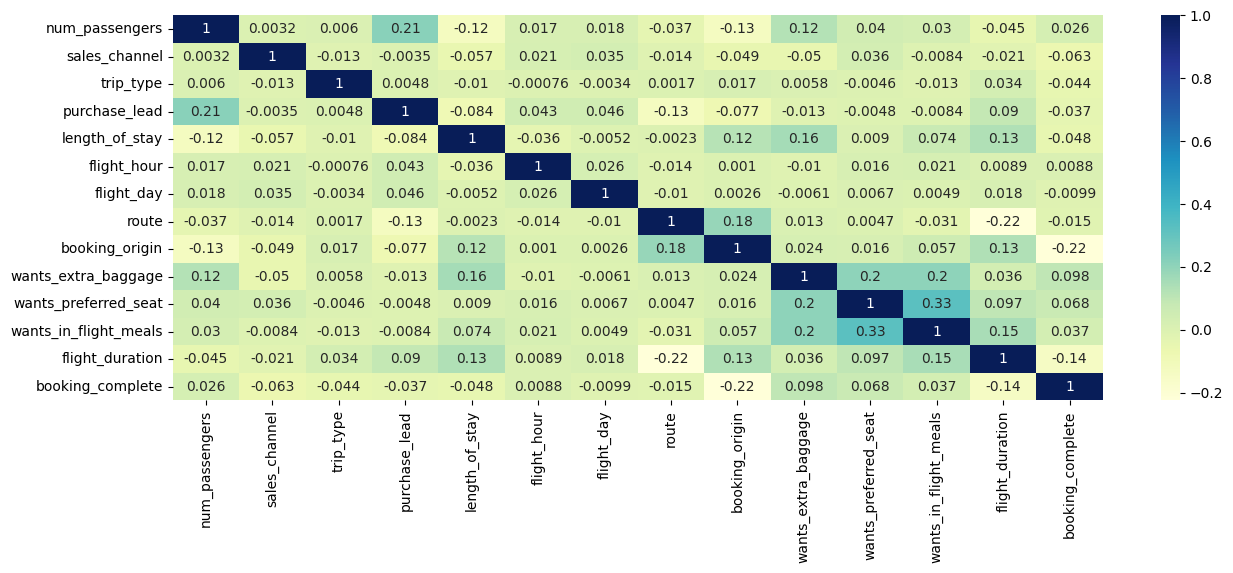

In [ ]:
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.show()

There are low correlations to the target but We will not remove any columns because it seems that multiple columns are related to each other which are needed for predicting the target.

#### Target Distribution

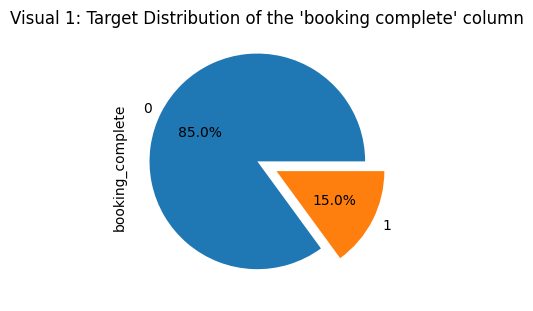

In [ ]:
plt.figure(figsize=(3.5, 3.5))

df['booking_complete'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%')

plt.title('Visual 1: Target Distribution of the \'booking complete\' column')
plt.show()

#### Balancing with Oversampling

In [ ]:
df_not_complete = df[df['booking_complete'] == 0]
df_not_complete.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,0,0,1,0,0,5.52,0
1,1,1,1,112,20,3,6,0,0,0,0,0,5.52,0


In [ ]:
df_complete = df[df['booking_complete'] == 1]
df_complete.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
82,1,1,1,15,31,17,1,6,6,0,0,0,8.83,1
86,1,1,1,156,19,14,1,6,6,1,0,0,8.83,1


In [ ]:
print(f'Not completed booking: {len(df_not_complete)}')
print(f'Completed booking: {len(df_complete)}')

Not completed booking: 42522
Completed booking: 7478


In [ ]:
df_complete = pd.concat([df_complete, df_complete], ignore_index=True)
df_complete = pd.concat([df_complete, df_complete], ignore_index=True)
df_complete = pd.concat([df_complete, df_complete], ignore_index=True)
df_complete = df_complete[:len(df_complete)-17302]

print(f'Not completed booking: {len(df_not_complete)}')
print(f'Completed booking: {len(df_complete)}')

Not completed booking: 42522
Completed booking: 42522


In [ ]:
df = pd.concat([df_complete, df_not_complete], ignore_index=True)
print(f'Whole dataset: {len(df)}')

Whole dataset: 85044


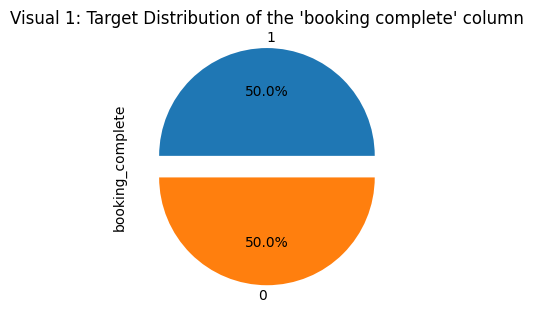

In [ ]:
plt.figure(figsize=(3.5, 3.5))

df['booking_complete'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%')

plt.title('Visual 1: Target Distribution of the \'booking complete\' column')
plt.show()

### Making the machine learning models

#### Splitting of dataset

In [ ]:
target = 'booking_complete'
y = df[target]
X = df.drop([target], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

#### Model validation

In [ ]:
def validating_model(model):
    print('Accuracy Score')
    print(model.score(X_test, y_test))
    print()
    print('F1 Score')
    predictions = model.predict(X_test)
    print(f1_score(predictions, y_test))
    print()
    print('Recall Score')
    print(recall_score(predictions, y_test))
    print()
    print('Precision Score')
    print(precision_score(predictions, y_test))
    print()

#### Logistic Regression

In [ ]:
model_logreg = LogisticRegression()
model_logreg.fit(X_train, y_train)
print('Logistic Regression Model performance:')
validating_model(model_logreg)

Logistic Regression Model performance:
Accuracy Score
0.6272561585043213

F1 Score
0.6331443120009258

Recall Score
0.6239023833960543

Precision Score
0.642664160695407



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Decision Tree Classifier

In [ ]:
model_dectree = DecisionTreeClassifier()
model_dectree.fit(X_train, y_train)
print('Decision Tree Classifier Model performance:')
validating_model(model_dectree)

Decision Tree Classifier Model performance:
Accuracy Score
0.9296842847904051

F1 Score
0.9343650532323565

Recall Score
0.8768153259861984

Precision Score
1.0



#### Random Forest Classifier

In [ ]:
model_randfor = RandomForestClassifier()
model_randfor.fit(X_train, y_train)
print('Random Forest Classifier Model performance:')
validating_model(model_randfor)

Random Forest Classifier Model performance:
Accuracy Score
0.9634899171027104

F1 Score
0.964809882699609

Recall Score
0.932012261878695

Precision Score
1.0



### Result

Of the three (3) machine learning models (Logistic Regression, Decision Tree Classifier, and Random Forest Classifier), Random Forest got the best score in terms of accuracy, f1 score, recall, and precision.